In [1]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
#Importing Data from CSV file
data=pd.read_csv("fer2013.csv")

In [4]:
labels=data.iloc[:,[0]].values

In [5]:
pixels=data['pixels']

In [6]:
#Facial Expressions
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [7]:
#converting pixels to Gray Scale images of 48X48 
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')

'Disgust'

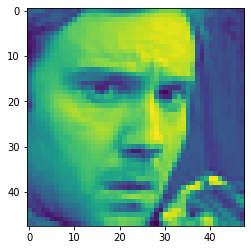

In [8]:
plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

In [9]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [10]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [12]:
classes=7
model = create_convolutional_model(classes)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_2

In [13]:
#train the CNN 
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 2007s - loss: 1.9103 - acc: 0.3086
Epoch 2/30
 - 1859s - loss: 1.5424 - acc: 0.4203
Epoch 3/30
 - 1949s - loss: 1.3360 - acc: 0.4894
Epoch 4/30
 - 2007s - loss: 1.2421 - acc: 0.5252
Epoch 5/30
 - 1884s - loss: 1.1533 - acc: 0.5624
Epoch 6/30
 - 1859s - loss: 1.0978 - acc: 0.5878
Epoch 7/30
 - 13777s - loss: 1.0270 - acc: 0.6140
Epoch 8/30
 - 1928s - loss: 0.9540 - acc: 0.6417
Epoch 9/30
 - 2115s - loss: 0.9262 - acc: 0.6539
Epoch 10/30
 - 3971s - loss: 0.8037 - acc: 0.7012
Epoch 11/30
 - 2129s - loss: 0.7101 - acc: 0.7387
Epoch 12/30
 - 1963s - loss: 0.6318 - acc: 0.7669
Epoch 13/30
 - 2613s - loss: 0.5315 - acc: 0.8048
Epoch 14/30
 - 2548s - loss: 0.4689 - acc: 0.8301
Epoch 15/30
 - 32962s - loss: 0.4050 - acc: 0.8543
Epoch 16/30
 - 1956s - loss: 0.3787 - acc: 0.8635
Epoch 17/30
 - 1843s - loss: 0.3143 - acc: 0.8877
Epoch 18/30
 - 1891s - loss: 0.2832 - acc: 0.8992
Epoch 19/30
 - 1851s - loss: 0.2513 - acc: 0.9114
Epoch 20/

In [14]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Normalized confusion matrix
[[4.38085328e-01 8.32466181e-03 9.36524454e-02 1.10301769e-01
  1.93548387e-01 1.35275754e-02 1.42559834e-01]
 [1.32075472e-01 5.00000000e-01 9.43396226e-02 4.71698113e-02
  1.41509434e-01 9.43396226e-03 7.54716981e-02]
 [8.25049702e-02 2.98210736e-03 4.07554672e-01 8.34990060e-02
  2.22664016e-01 7.45526839e-02 1.26242545e-01]
 [1.74197060e-02 0.00000000e+00 1.79640719e-02 8.55743059e-01
  4.35492651e-02 1.03429505e-02 5.49809472e-02]
 [7.77160983e-02 2.37906423e-03 9.91276764e-02 9.51625694e-02
  5.24980174e-01 9.51625694e-03 1.91118160e-01]
 [3.00375469e-02 1.25156446e-03 7.38423029e-02 7.75969962e-02
  2.62828536e-02 7.38423029e-01 5.25657071e-02]
 [5.46357616e-02 8.27814570e-04 5.71192053e-02 1.11754967e-01
  1.64735099e-01 9.93377483e-03 6.00993377e-01]]


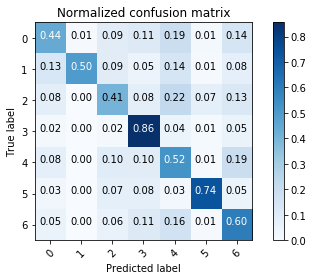

In [15]:
#making confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
#Save the weights
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)

In [17]:
#Save the weights
filename='model_weights.hdf5'
model.load_weights(filename)

In [18]:
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

In [19]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("cascades\data\haarcascade_frontalface_default.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret,img=cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

In [24]:
face_in_video()